In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
image = Image.open("figure.jpg")

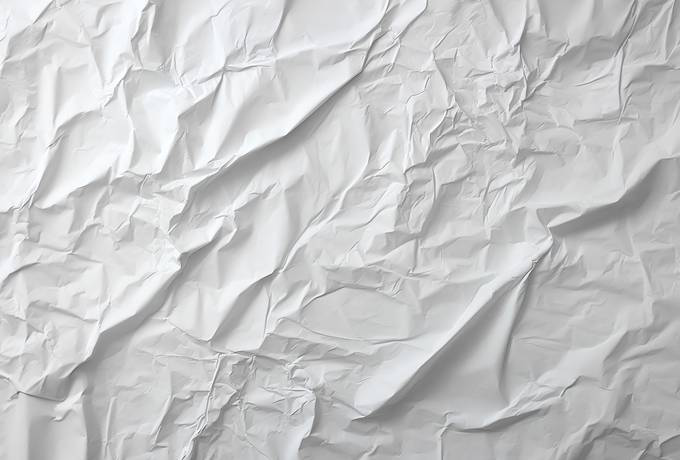

In [3]:
display(image)

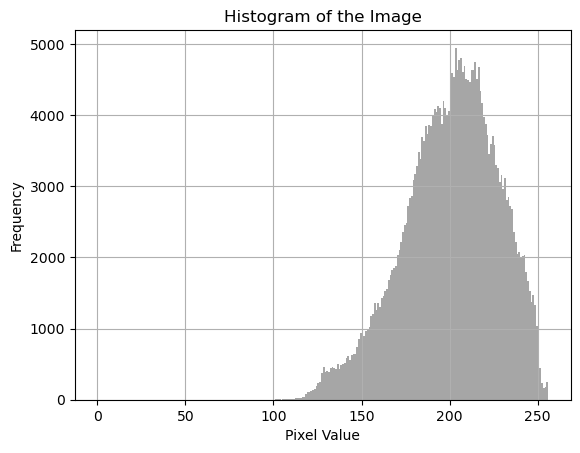

In [4]:
gray_image = image.convert('L')
pixels = np.array(gray_image)
plt.hist(pixels.flatten(), bins=256, range=[0,256], color='gray', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Image')
plt.grid()

In [5]:
image_width, image_height = image.size
image_width, image_height

(680, 460)

In [6]:
region_width = image_width // 34
region_height = image_height // 23

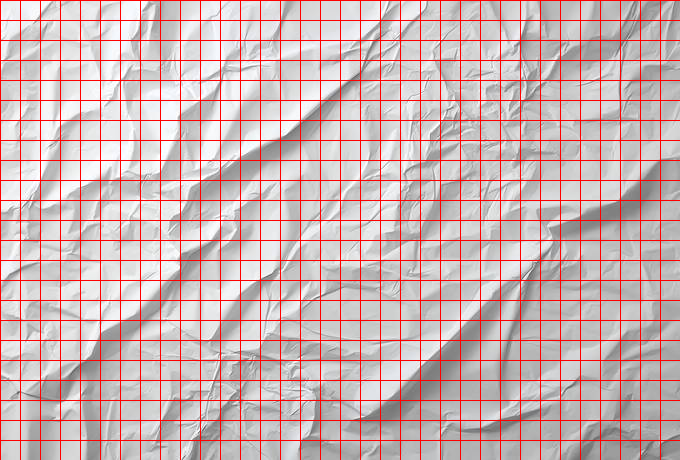

In [7]:
image_copy = image.copy()
draw = ImageDraw.Draw(image_copy)
for i in range(23):
    for j in range(34):
        left = j * region_width
        top = i * region_height
        right = left + region_width
        bottom = top + region_height
        draw.rectangle([left, top, right, bottom], outline="red", width=1)
display(image_copy)

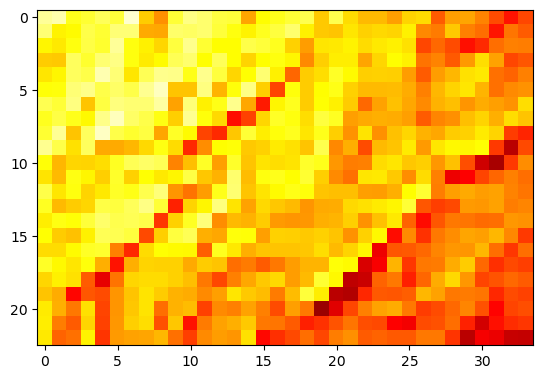

In [8]:
image_copy = image.copy()
average_pixel_values = []
for i in range(23):
    for j in range(34):
        left = j * region_width
        top = i * region_height
        right = left + region_width
        bottom = top + region_height
        region = image.crop((left, top, right, bottom))
        average_pixel_value = np.mean(np.array(region))
        average_pixel_values.append(average_pixel_value)
average_pixel_values = np.array(average_pixel_values).reshape(23, 34)
plt.imshow(average_pixel_values, cmap='hot', interpolation='nearest', vmin=100, vmax=255)